# Pandas

In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(seed=1234)

In [4]:
# Read from CSV to Pandas DataFrame
df = pd.read_csv('titanic.csv', header=0)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df = df.drop('PassengerId', axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

In [11]:
import matplotlib.pyplot as plt

In [12]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


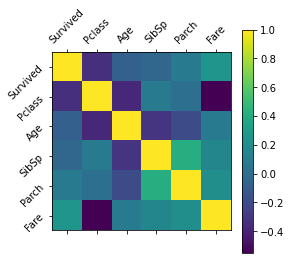

In [14]:
# corrleation matrix
plt.matshow(df.corr())
continous_features = df.describe().columns

plt.xticks(range(len(continous_features)), continous_features, rotation=45)
plt.yticks(range(len(continous_features)), continous_features, rotation=45)
plt.colorbar()
plt.show();

### Histrogram

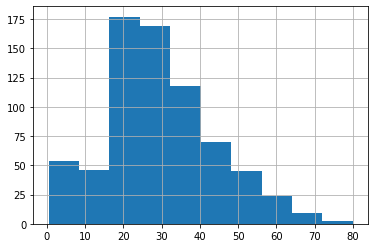

In [16]:
df['Age'].hist();

In [17]:
# unique values
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

# Filtering

In [18]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [22]:
# only female
df[df['Sex'] == 'female'].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Sorting

In [24]:
df.sort_values('Age', ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


# Grouping

In [25]:
survived_group = df.groupby('Survived')
survived_group.mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


# Indexing

In [26]:
# selecting row 0
df.iloc[0, :]

Survived                          0
Pclass                            3
Name        Braund, Mr. Owen Harris
Sex                            male
Age                              22
SibSp                             1
Parch                             0
Ticket                    A/5 21171
Fare                           7.25
Cabin                           NaN
Embarked                          S
Name: 0, dtype: object

In [28]:
# selecting specific value
df.iloc[0, 2]

'Braund, Mr. Owen Harris'

# Preprocessing

In [29]:
# Rows with at least one NaN value
df[pd.isnull(df).any(axis=1)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [30]:
# Drop rows with NaN values
df = df.dropna() # removes rows with any NaN values
df = df.reset_index() # reset rows indexes in case any rows were dropped
df.head()

,index,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [31]:
# Dropping multiple columns
df = df.drop(['Name', 'Cabin', 'Ticket'], axis=1)
df.head()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,1,female,38.0,1,0,71.2833,C
1,3,1,1,female,35.0,1,0,53.1000,S
2,6,0,1,male,54.0,0,0,51.8625,S
3,10,1,3,female,4.0,1,1,16.7000,S
4,11,1,1,female,58.0,0,0,26.5500,S


In [32]:
# Map features values
df['Sex'] = df['Sex'].map({'female': 0, 'male':1}).astype(int)

df['Embarked']  = df['Embarked'].dropna().map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

df.head()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,1,0,38.0,1,0,71.2833,1
1,3,1,1,0,35.0,1,0,53.1000,0
2,6,0,1,1,54.0,0,0,51.8625,0
3,10,1,3,0,4.0,1,1,16.7000,0
4,11,1,1,0,58.0,0,0,26.5500,0


# Feature Engineering

We are going to create family size column.

In [33]:
def get_family_size(sibsp, parch):
    family_size = sibsp + parch
    return family_size

In [34]:
df['Family_Size'] = df[['SibSp', 'Parch']].apply(lambda x: get_family_size(x['SibSp'], x['Parch']), axis=1)

In [35]:
df.head()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size
0,1,1,1,0,38.0,1,0,71.2833,1,1
1,3,1,1,0,35.0,1,0,53.1000,0,1
2,6,0,1,1,54.0,0,0,51.8625,0,0
3,10,1,3,0,4.0,1,1,16.7000,0,2
4,11,1,1,0,58.0,0,0,26.5500,0,0


In [39]:
# Reorganize header
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Family_Size', 'Embarked', 'Survived']]
df.head()

,Pclass,Sex,Age,SibSp,Parch,Family_Size,Embarked,Survived
0,1,0,38.0,1,0,1,1,1
1,1,0,35.0,1,0,1,0,1
2,1,1,54.0,0,0,0,0,0
3,3,0,4.0,1,1,2,0,1
4,1,0,58.0,0,0,0,0,1


# Save Data

In [40]:
df.to_csv('processed_titanic.csv', index=False)

In [41]:
# see the saved file
!ls -l

total 168
-rw-r--r-- 1 Phone Thiri Yadana 197610 23564 May 14 13:18 01_Foundation_NumPy.ipynb
-rw-r--r-- 1 Phone Thiri Yadana 197610 78902 May 14 13:43 02_Foundation_Pandas.ipynb
-rw-r--r-- 1 Phone Thiri Yadana 197610  3709 May 14 13:42 processed_titanic.csv
-rw-r--r-- 1 Phone Thiri Yadana 197610 61194 Mar 17  2019 titanic.csv
